<a href="https://colab.research.google.com/github/nanda3-vit/DataCleaning/blob/main/ECGClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ECG Heartbeat Categorization (Neural Network) 

**Loading the data and exploring its shape and values**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.utils import resample


In [53]:
mit_test = pd.read_csv('/content/sample_data/mitbih_test.csv',header=None)
mit_train = pd.read_csv('/content/sample_data/mitbih_train.csv', header=None)
ptb_abnormal = pd.read_csv('/content/sample_data/ptbdb_abnormal.csv', header=None)
ptb_normal = pd.read_csv('/content/sample_data/ptbdb_normal.csv', header=None)

In [3]:
mit_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mit_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ptb_abnormal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,0.649870,0.635100,0.655083,0.664639,0.633362,0.746308,0.871416,0.938314,1.000000,0.948740,0.396177,0.000000,0.039096,0.128584,0.305821,0.640313,0.617724,0.537793,0.352737,0.220678,0.256299,0.357950,0.482189,0.570808,0.577758,0.620330,0.622068,0.618593,0.626412,0.612511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,0.125101,0.129136,0.137207,0.137207,0.132365,0.126715,0.158192,0.152542,0.132365,0.168684,0.156578,0.183212,0.191283,0.204197,0.230024,0.244552,0.285714,0.307506,0.321227,0.327684,0.351897,0.373688,0.397094,0.363196,0.340597,0.307506,0.258273,0.197740,0.199354,0.173527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,0.681260,0.616743,0.624424,0.619816,0.596006,0.627496,0.631336,0.619048,0.612903,0.613671,0.607527,0.586790,0.568356,0.543779,0.526882,0.552995,0.577573,0.592166,0.576037,0.579109,0.573733,0.589862,0.542243,0.519201,0.514593,0.528418,0.493856,0.485407,0.461598,0.478495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,0.357671,0.379852,0.375231,0.397412,0.388170,0.378004,0.398336,0.419593,0.427911,0.402033,0.378928,0.400185,0.406654,0.422366,0.402033,0.383549,0.398336,0.393715,0.417745,0.388170,0.360444,0.402957,0.392791,0.413124,0.377079,0.327172,0.346580,0.338262,0.356747,0.314233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,0.285566,0.343718,0.281412,0.281412,0.283489,0.281412,0.319834,0.311526,0.283489,0.278297,0.274143,0.317757,0.267913,0.275182,0.280374,0.255452,0.313603,0.266874,0.244029,0.198339,0.192108,0.190031,0.134995,0.086189,0.078920,0.036345,0.024922,0.000000,0.044652,0.024922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
ptb_normal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,0.106564,0.106969,0.115883,0.122366,0.122366,0.119530,0.115883,0.122366,0.126013,0.133712,0.134927,0.142626,0.151135,0.158428,0.163695,0.173825,0.188817,0.207861,0.230956,0.258509,0.294571,0.325770,0.362642,0.398298,0.429498,0.449352,0.450972,0.418963,0.372771,0.310373,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,0.361781,0.362400,0.366110,0.367965,0.374150,0.377860,0.382189,0.384663,0.398887,0.401361,0.418058,0.443414,0.457638,0.487941,0.520717,0.559678,0.604205,0.634508,0.653680,0.672851,0.678417,0.660482,0.621521,0.555968,0.482375,0.438466,0.378479,0.351268,0.319728,0.306741,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,0.077342,0.087223,0.091993,0.095060,0.096422,0.104940,0.108007,0.113799,0.116525,0.119932,0.124361,0.132198,0.145826,0.152641,0.163543,0.175468,0.189438,0.204770,0.229302,0.252811,0.275980,0.302555,0.321295,0.333901,0.345826,0.348552,0.347189,0.334242,0.306644,0.274617,...,0.168313,0.170017,0.174106,0.178194,0.183646,0.186371,0.191141,0.194549,0.201704,0.208177,0.212266,0.219762,0.227598,0.238842,0.249063,0.254514,0.270187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,0.049059,0.051341,0.049344,0.045921,0.049914,0.053908,0.049629,0.045921,0.055048,0.053622,0.063605,0.066172,0.083286,0.094980,0.115801,0.131204,0.153166,0.178266,0.210211,0.232744,0.266115,0.286651,0.305762,0.317456,0.304906,0.264689,0.223902,0.191671,0.140901,0.111808,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,0.086931,0.094027,0.095801,0.096393,0.089592,0.094914,0.089592,0.094914,0.098167,0.102306,0.099645,0.096688,0.108516,0.127735,0.128326,0.149024,0.172383,0.204021,0.221762,0.254287,0.284743,0.309284,0.329687,0.344175,0.359846,0.333530,0.292135,0.253400,0.216736,0.171496,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
mit_test.rename(columns={187:"Class"}, inplace=True)
mit_train.rename(columns={187:"Class"}, inplace=True)
ptb_abnormal.rename(columns={187:"Class"}, inplace=True)
ptb_normal.rename(columns={187:"Class"}, inplace=True)

Looking at how many classes are there in each dataset The MIT dataset has 5 clases:

0 = N (Normal Beat)
1 = S (Supraventricular premature beat)
2 = V (Premature ventricular contraction)
3 = F (Fusion of ventricular and normal beat)
4 = Q (Unclassifiable beat)
Compared to the PTB dataset which is 1 for abnormal and 0 for normal

In [8]:
print ("MIT Train classes: \n", mit_train["Class"].value_counts())
print ("\nMIT Test classes: \n", mit_test["Class"].value_counts())
print ("\nPTB Abnormal classes: \n", ptb_abnormal["Class"].value_counts())
print ("\nPTB Normal classes: \n", ptb_normal["Class"].value_counts())

MIT Train classes: 
 0.0    39042
Name: Class, dtype: int64

MIT Test classes: 
 0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Class, dtype: int64

PTB Abnormal classes: 
 1.0    10506
Name: Class, dtype: int64

PTB Normal classes: 
 0.0    4046
Name: Class, dtype: int64


In [9]:
# Setting Dictionary to define the type of Heartbeat for both datasets
MIT_Outcome = {0. : 'Normal Beat',
               1. : 'Supraventricular premature beat',
               2. : 'Premature ventricular contraction',
               3. : 'Fusion of ventricular and normal beat',
               4. : 'Unclassifiable beat'}
PTB_Outcome = {0. : 'Normal',
               1. : 'Abnormal'}

**Generating Plots of some of the samples in the dataset**

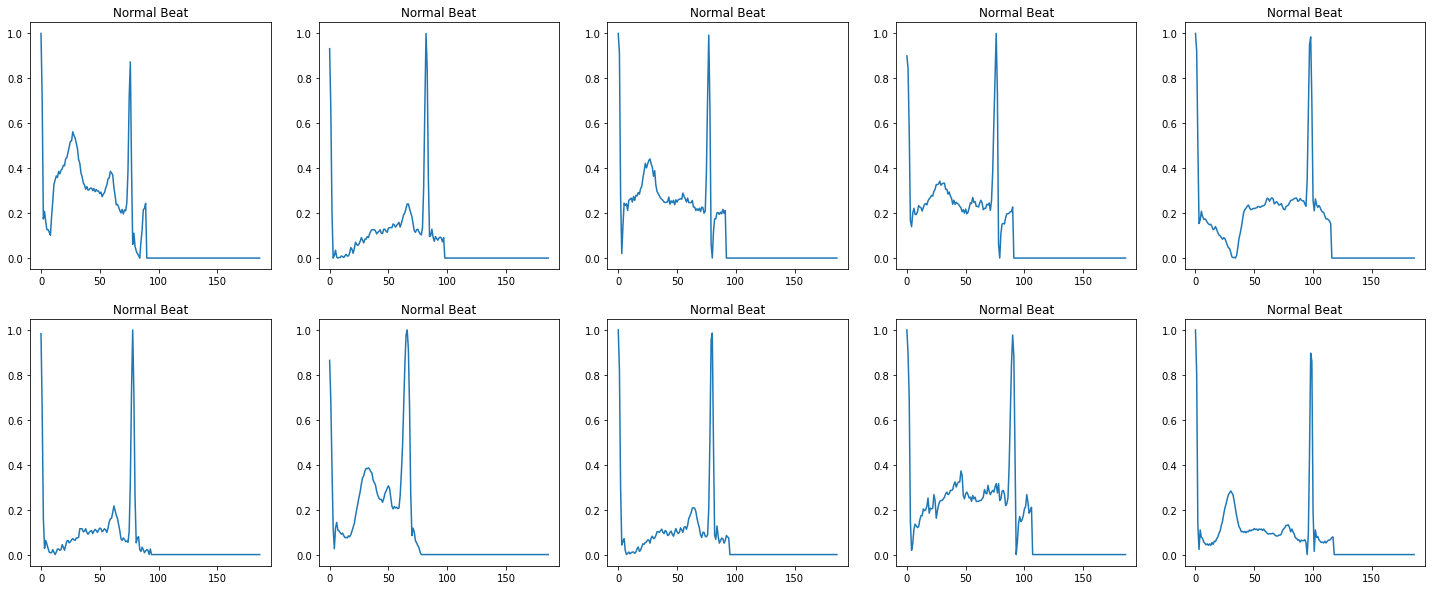

In [10]:
#Plotting 10 random samples from the MIT training dataset with their classification
plt.figure(figsize=(25,10))
np_count = np.linspace(0,186,187)
np_time = np.tile(np_count,(10,1))
rnd = np.random.randint(0,mit_train.shape[0],size=(10,))


for i in range(np_time.shape[0]):
    ax = plt.subplot(2,5,i+1)
    ax.plot(mit_train.iloc[rnd[i],np_time[i,:]])
    ax.set_title(MIT_Outcome[mit_train.loc[rnd[i],'Class']])

plt.show()

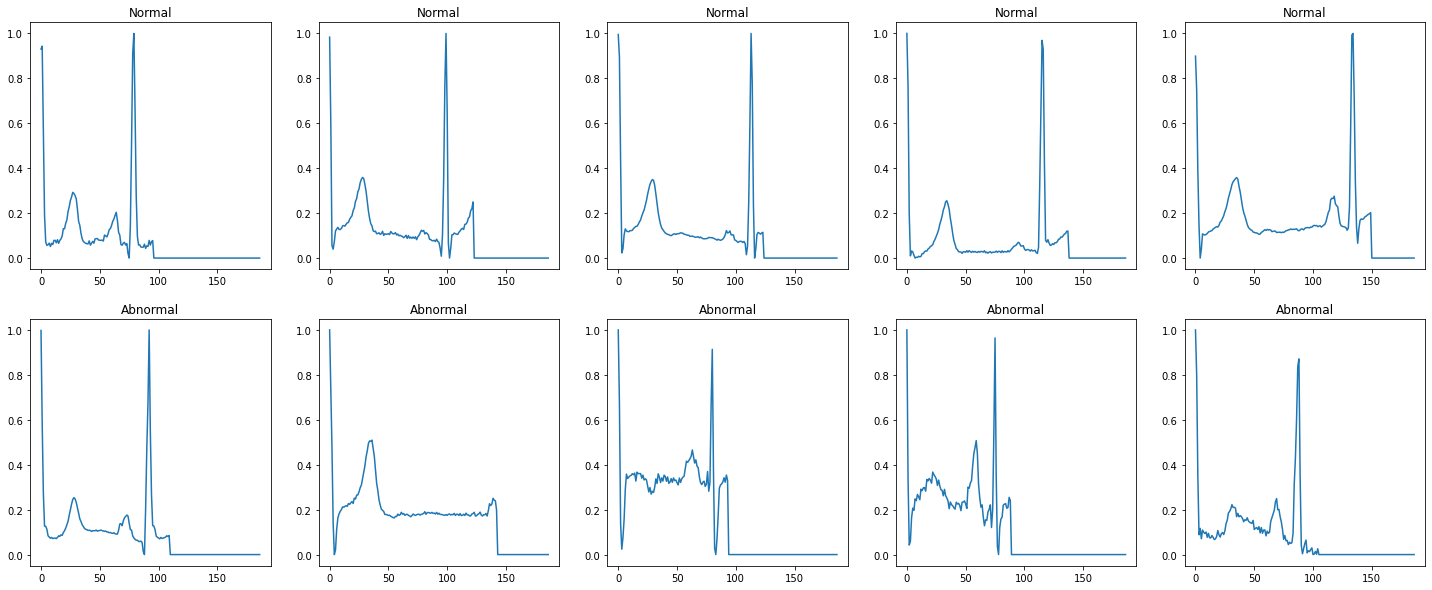

In [11]:
#Plotting 10 random samples from the PTB training dataset with their classification
plt.figure(figsize=(25,10))
rnd = np.random.randint(0,ptb_normal.shape[0],size=(5,))
rnd1 = np.random.randint(0,ptb_abnormal.shape[0], size=(5,))

for i in range(np_time.shape[0]):
    ax = plt.subplot(2,5,i+1)
    if (i < 5):
        ax.plot(ptb_normal.iloc[rnd[i],np_time[i,:]])
        ax.set_title(PTB_Outcome[ptb_normal.loc[rnd[i],'Class']])
    else:
        ax.plot(ptb_abnormal.iloc[rnd1[i-5],np_time[i,:]])
        ax.set_title(PTB_Outcome[ptb_abnormal.loc[rnd1[i-5],'Class']])

plt.show()

# **Deep Learning Analysis**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, InputLayer, LSTM, GRU, BatchNormalization, Bidirectional, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical

In [14]:
#Preparing the training, validation and test sets for the PTB Data set
ptb_full = pd.concat([ptb_normal, ptb_abnormal], axis=0).reset_index()
ptb_full.drop(columns='index', inplace=True)
ptb_full = ptb_full.sample(ptb_full.shape[0], random_state=42)
train_ptb, test_ptb, out_train_ptb, out_test_ptb = train_test_split(ptb_full.iloc[:,:187], ptb_full.iloc[:,-1], test_size=0.15, random_state=42)
train_ptb, valid_ptb, out_train_ptb, out_valid_ptb = train_test_split(train_ptb, out_train_ptb, test_size=0.2, random_state=42 )

Calculating the class weight

In [62]:
normal, abnormal = np.bincount(ptb_full.loc[:,'Class'])
norm_weight = (1/normal) * ((normal+abnormal)/2)
abnorm_weight = (1/abnormal) * ((normal+abnormal)/2)
class_weight = {0: norm_weight, 1: abnorm_weight}

In [16]:
print("Traing dataset size: ", train_ptb.shape)
print("Validation dataset size: ", valid_ptb.shape)
print("Test dataset size: ", test_ptb.shape)

Traing dataset size:  (9895, 187)
Validation dataset size:  (2474, 187)
Test dataset size:  (2183, 187)


In [17]:
#Normalizing the training, validation & test data 
train_ptb = normalize(train_ptb, axis=0, norm='max')
valid_ptb = normalize(valid_ptb, axis=0, norm='max')
test_ptb = normalize(test_ptb, axis=0, norm='max')

In [18]:
# Reshaping the dataframe into a 3-D Numpy array (batch, Time Period, Value)
x_train_ptb = train_ptb.reshape(len(train_ptb),train_ptb.shape[1],1)
x_valid_ptb = valid_ptb.reshape(len(valid_ptb),valid_ptb.shape[1],1)
x_test_ptb = test_ptb.reshape(len(test_ptb),test_ptb.shape[1],1)

# Converting the output into a categorical array
y_train_ptb = to_categorical(out_train_ptb)
y_valid_ptb = to_categorical(out_valid_ptb)
y_test_ptb = to_categorical(out_test_ptb)

In [19]:
print("Traing dataset size: ", x_train_ptb.shape , " -- Y size: ", y_train_ptb.shape)
print("Validation dataset size: ", x_valid_ptb.shape , " -- Y size: ", y_valid_ptb.shape)
print("Test dataset size: ", x_test_ptb.shape , " -- Y size: ", y_test_ptb.shape)


Traing dataset size:  (9895, 187, 1)  -- Y size:  (9895, 2)
Validation dataset size:  (2474, 187, 1)  -- Y size:  (2474, 2)
Test dataset size:  (2183, 187, 1)  -- Y size:  (2183, 2)


Defining Conv1D model for PTB

In [20]:
tf.keras.backend.clear_session()

#Function to build Convolutional 1D Networks
def build_conv1d_model (input_shape=(x_train_ptb.shape[1],1)):
    model = keras.models.Sequential()
    
    model.add(Conv1D(32,7, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(64,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(128,7, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(256,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(512,7, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(2,"micro")])
    return model

In [24]:
!pip install tensorflow-addons
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 679 kB 5.1 MB/s 
     |████████████████████████████████| 88.7 MB 10 kB/s 
     |████████████████████████████████| 3.1 MB 54.1 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 496 kB 56.6 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 2.0.0b1 which is incompatible.


In [25]:
import tensorflow as tf
import tensorflow_addons as tfa

In [26]:
checkpoint_cb = ModelCheckpoint("conv1d_ptb.h5", save_best_only=True)

earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

model_conv1d_ptb= build_conv1d_model(input_shape=(x_train_ptb.shape[1], x_train_ptb.shape[2]))

model_conv1d_ptb.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 187, 32)           256       
_________________________________________________________________
batch_normalization_10 (Batc (None, 187, 32)           128       
_________________________________________________________________
re_lu_10 (ReLU)              (None, 187, 32)           0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 38, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 38, 64)            14400     
_________________________________________________________________
batch_normalization_11 (Batc (None, 38, 64)            256       
_________________________________________________________________
re_lu_11 (ReLU)              (None, 38, 64)           

In [27]:
history_conv1d_ptb = model_conv1d_ptb.fit(x_train_ptb, y_train_ptb, epochs=40, batch_size=32, 
                                          class_weight=class_weight, validation_data=(x_valid_ptb, y_valid_ptb),  
                                          callbacks=[checkpoint_cb, earlystop_cb])

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
309/310 [============================>.] - ETA: 0s - loss: 0.3634 - f1_score: 0.8327WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_functi

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  synchronization=synchronization,


310/310 [==============================] - 45s 135ms/step - loss: 0.3632 - f1_score: 0.8328 - val_loss: 0.8523 - val_f1_score: 0.7179
Epoch 2/40
310/310 [==============================] - 41s 132ms/step - loss: 0.2136 - f1_score: 0.9157 - val_loss: 0.3500 - val_f1_score: 0.8294
Epoch 3/40
310/310 [==============================] - 41s 132ms/step - loss: 0.1538 - f1_score: 0.9366 - val_loss: 0.1135 - val_f1_score: 0.9563
Epoch 4/40
310/310 [==============================] - 41s 133ms/step - loss: 0.1251 - f1_score: 0.9540 - val_loss: 0.3181 - val_f1_score: 0.8824
Epoch 5/40
310/310 [==============================] - 41s 134ms/step - loss: 0.0914 - f1_score: 0.9673 - val_loss: 0.2643 - val_f1_score: 0.9143
Epoch 6/40
310/310 [==============================] - 41s 133ms/step - loss: 0.0979 - f1_score: 0.9638 - val_loss: 0.2215 - val_f1_score: 0.9196
Epoch 7/40
310/310 [==============================] - 42s 135ms/step - loss: 0.1037 - f1_score: 0.9612 - val_loss: 0.1309 - val_f1_score: 0.9

In [28]:
model_conv1d_ptb.load_weights("conv1d_ptb.h5")
model_conv1d_ptb.evaluate(x_test_ptb,y_test_ptb)

14/69 [=====>........................] - ETA: 0s - loss: 0.1352 - f1_score: 0.9621

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  synchronization=synchronization,


69/69 [==============================] - 1s 13ms/step - loss: 0.1298 - f1_score: 0.9524


[0.1297689825296402, 0.952359139919281]

In [29]:
# Calculating the predictions based on the highest probability class
conv1d_pred_proba_ptb = model_conv1d_ptb.predict (x_test_ptb)
conv1d_pred_ptb = np.argmax(conv1d_pred_proba_ptb, axis=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [30]:
print(classification_report(out_test_ptb, conv1d_pred_ptb > 0.5, target_names=[PTB_Outcome[i] for i in PTB_Outcome]))

              precision    recall  f1-score   support

      Normal       0.92      0.92      0.92       616
    Abnormal       0.97      0.97      0.97      1567

    accuracy                           0.95      2183
   macro avg       0.94      0.94      0.94      2183
weighted avg       0.95      0.95      0.95      2183



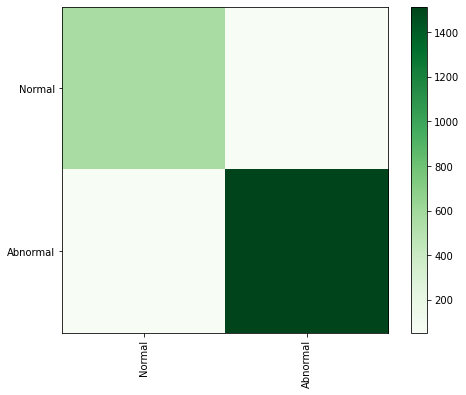

In [34]:
cm = confusion_matrix(y_true= out_test_ptb, y_pred=conv1d_pred_ptb, labels=list(PTB_Outcome.keys()))
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Greens")
plt.colorbar()
plt.xticks(list(PTB_Outcome.keys()),[PTB_Outcome[i] for i in PTB_Outcome], rotation=90)
plt.yticks(list(PTB_Outcome.keys()),[PTB_Outcome[i] for i in PTB_Outcome])
plt.show()

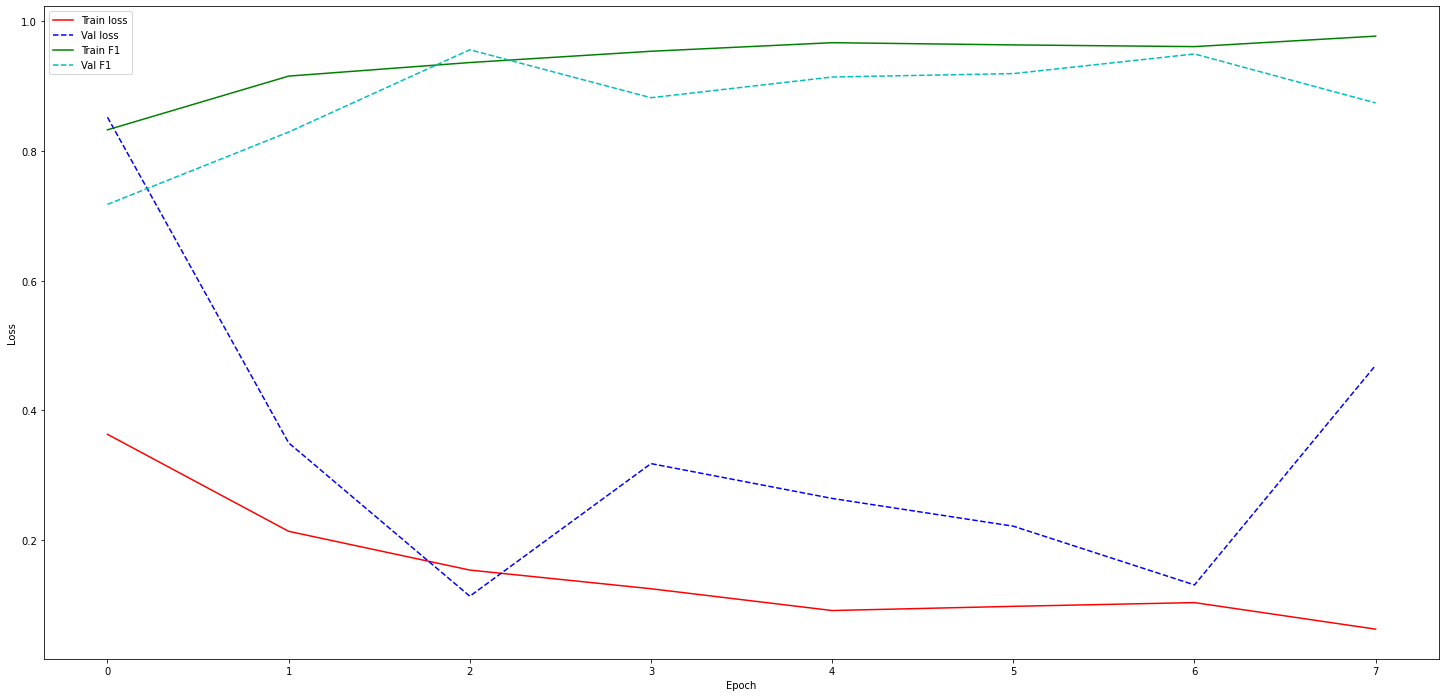

In [35]:
# Plotting the training and validation results
plt.figure(figsize=(25,12))
plt.plot(history_conv1d_ptb.epoch, history_conv1d_ptb.history['loss'],
           color='r', label='Train loss')
plt.plot(history_conv1d_ptb.epoch, history_conv1d_ptb.history['val_loss'],
           color='b', label='Val loss' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history_conv1d_ptb.epoch, history_conv1d_ptb.history['f1_score'],
           color='g', label='Train F1')
plt.plot(history_conv1d_ptb.epoch, history_conv1d_ptb.history['val_f1_score'],
           color='c', label='Val F1' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Defining Conv1D Residual model for PTB

In [36]:
def build_conv1d_res_model (input_shape=(x_train_ptb.shape[1],1)):
    model = keras.models.Sequential()
    
    input_ = tf.keras.layers.Input (shape=(input_shape))
    
    conv1_1 = Conv1D(64,7, padding='same', input_shape=input_shape) (input_)
    conv1_1 = BatchNormalization() (conv1_1)
    conv1_1 = tf.keras.layers.ReLU() (conv1_1)

    conv1_2 = Conv1D(64,7, padding='same') (conv1_1)
    conv1_2 = BatchNormalization() (conv1_2)
    conv1_2 = tf.keras.layers.ReLU() (conv1_2)
   
    conv1_3 = Conv1D(64,7, padding='same') (conv1_2)
    conv1_3 = BatchNormalization() (conv1_3)
    conv1_3 = tf.keras.layers.ReLU() (conv1_3)

    concat_1 = Concatenate()([conv1_1 , conv1_3 ])
    max_1 = MaxPool1D(5, padding="same") (concat_1)
    
    conv1_4 = Conv1D(128,7, padding='same') (max_1)
    conv1_4 = BatchNormalization() (conv1_4)
    conv1_4 = tf.keras.layers.ReLU() (conv1_4)

    conv1_5 = Conv1D(128,7, padding='same', input_shape=input_shape) (conv1_4)
    conv1_5 = BatchNormalization() (conv1_5)
    conv1_5 = tf.keras.layers.ReLU() (conv1_5)
    
    conv1_6 = Conv1D(128,7, padding='same', input_shape=input_shape) (conv1_5)
    conv1_6 = BatchNormalization() (conv1_6)
    conv1_6 = tf.keras.layers.ReLU() (conv1_6)

    concat_2 = Concatenate()([conv1_4, conv1_6])
    max_2 = MaxPool1D(5, padding="same") (concat_2)

    flat = Flatten() (max_2)
    dense_1 = Dense(512, activation='relu') (flat)
    drop_1 = Dropout(0.5) (dense_1)
    dense_2 = Dense(256, activation='relu') (drop_1)
    drop_2 = Dropout(0.5) (dense_2)
    dense_3 = Dense(128, activation='relu') (drop_2)
    dense_4 = Dense(64, activation='relu') (dense_3)
    dense_5 = Dense(32, activation='relu') (dense_4)
    dense_6 = Dense(2, activation="softmax") (dense_5)
    
    model = Model (inputs=input_ , outputs=dense_6)
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(2,"micro")])
    return model

In [37]:
checkpoint_cb = ModelCheckpoint("conv1d_res_ptb.h5", save_best_only=True)

earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

inp_shape = (x_train_ptb.shape[1], x_train_ptb.shape[2])
model_conv1d_res_ptb= build_conv1d_res_model(input_shape=(x_train_ptb.shape[1], x_train_ptb.shape[2]))
#model_conv1d_res_ptb.build(inp_shape)

In [38]:
history_conv1d_res_ptb = model_conv1d_res_ptb.fit(x_train_ptb, y_train_ptb, epochs=40, batch_size=32, 
                                          class_weight=class_weight, validation_data=(x_valid_ptb, y_valid_ptb),  
                                          callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
310/310 [==============================] - ETA: 0s - loss: 0.5296 - f1_score: 0.7259WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f4b64174950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set th

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  synchronization=synchronization,


310/310 [==============================] - 69s 214ms/step - loss: 0.5296 - f1_score: 0.7259 - val_loss: 0.6494 - val_f1_score: 0.7191
Epoch 2/40
310/310 [==============================] - 66s 212ms/step - loss: 0.2285 - f1_score: 0.9164 - val_loss: 0.2765 - val_f1_score: 0.8703
Epoch 3/40
310/310 [==============================] - 66s 213ms/step - loss: 0.1269 - f1_score: 0.9576 - val_loss: 0.0845 - val_f1_score: 0.9640
Epoch 4/40
310/310 [==============================] - 66s 212ms/step - loss: 0.0908 - f1_score: 0.9699 - val_loss: 0.0775 - val_f1_score: 0.9681
Epoch 5/40
310/310 [==============================] - 66s 212ms/step - loss: 0.0772 - f1_score: 0.9718 - val_loss: 0.0913 - val_f1_score: 0.9584
Epoch 6/40
310/310 [==============================] - 65s 211ms/step - loss: 0.0532 - f1_score: 0.9812 - val_loss: 0.1138 - val_f1_score: 0.9539
Epoch 7/40
310/310 [==============================] - 66s 212ms/step - loss: 0.0510 - f1_score: 0.9833 - val_loss: 0.0883 - val_f1_score: 0.9

In [39]:
model_conv1d_res_ptb.load_weights("conv1d_res_ptb.h5")
model_conv1d_res_ptb.evaluate(x_test_ptb,y_test_ptb)

 3/69 [>.............................] - ETA: 2s - loss: 0.0643 - f1_score: 0.9792    

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  synchronization=synchronization,


69/69 [==============================] - 3s 43ms/step - loss: 0.0502 - f1_score: 0.9876


[0.050151873379945755, 0.9876317381858826]

In [40]:
# Calculating the predictions based on the highest probability class
conv1d_res_pred_proba_ptb = model_conv1d_res_ptb.predict (x_test_ptb)
conv1d_res_pred_ptb = np.argmax(conv1d_res_pred_proba_ptb, axis=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [41]:
print(classification_report(out_test_ptb, conv1d_res_pred_ptb > 0.5, target_names=[PTB_Outcome[i] for i in PTB_Outcome]))

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.98       616
    Abnormal       0.99      0.99      0.99      1567

    accuracy                           0.99      2183
   macro avg       0.99      0.98      0.98      2183
weighted avg       0.99      0.99      0.99      2183



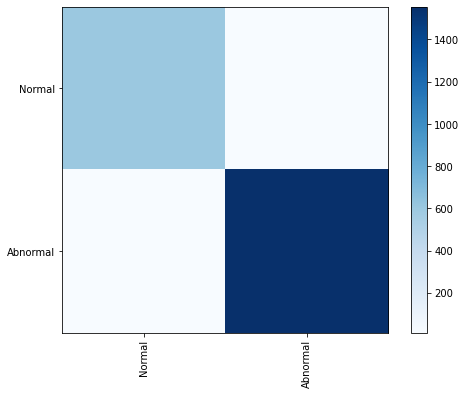

In [42]:
cm = confusion_matrix(y_true= out_test_ptb, y_pred=conv1d_res_pred_ptb, labels=list(PTB_Outcome.keys()))
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.xticks(list(PTB_Outcome.keys()),[PTB_Outcome[i] for i in PTB_Outcome], rotation=90)
plt.yticks(list(PTB_Outcome.keys()),[PTB_Outcome[i] for i in PTB_Outcome])
plt.show()

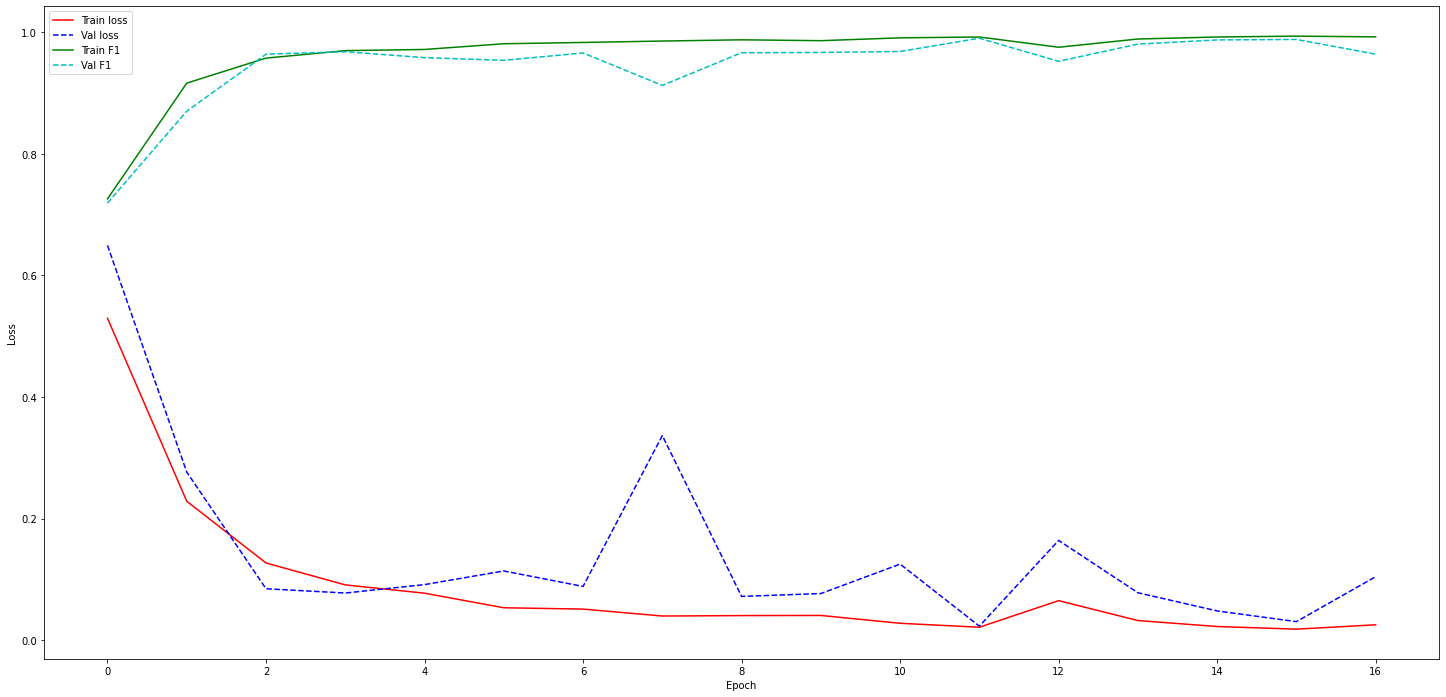

In [43]:
# Plotting the training and validation results
plt.figure(figsize=(25,12))
plt.plot(history_conv1d_res_ptb.epoch, history_conv1d_res_ptb.history['loss'],
           color='r', label='Train loss')
plt.plot(history_conv1d_res_ptb.epoch, history_conv1d_res_ptb.history['val_loss'],
           color='b', label='Val loss' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history_conv1d_res_ptb.epoch, history_conv1d_res_ptb.history['f1_score'],
           color='g', label='Train F1')
plt.plot(history_conv1d_res_ptb.epoch, history_conv1d_res_ptb.history['val_f1_score'],
           color='c', label='Val F1' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**MIT Dataset Analysis**

In [54]:
# Since the MIT dataset already comes as a train set and test set, we just split 20% of the training set for validation
train_mit, valid_mit, out_train_mit, out_valid_mit = train_test_split(mit_train.iloc[:,:187], mit_train.iloc[:,-1], test_size=0.20, random_state=42)

#we remove the targets from the test set
test_mit, out_test_mit = mit_test.iloc[:,:187], mit_test.iloc[:,-1]

#Normalizing the training & test data 
train_mit = normalize(train_mit, axis=0, norm='max')
valid_mit = normalize(valid_mit, axis=0, norm='max')
test_mit = normalize(test_mit, axis=0, norm='max')

In [55]:
# Reshaping the dataframe into a 3-D Numpy array (batch, Time Period, Value)
x_train_mit = train_mit.reshape(len(train_mit),train_mit.shape[1],1)
x_valid_mit = valid_mit.reshape(len(valid_mit),valid_mit.shape[1],1)
x_test_mit = test_mit.reshape(len(test_mit),test_mit.shape[1],1)

# Converting the output into a categorical array for each class
y_train_mit = to_categorical(out_train_mit)
y_valid_mit = to_categorical(out_valid_mit)
y_test_mit = to_categorical(out_test_mit)

In [71]:
print("Traing dataset size: ", x_train_mit.shape , " -- Y size: ", y_train_mit.shape)
print("Validation dataset size: ", x_valid_mit.shape , " -- Y size: ", y_valid_mit.shape)
print("Test dataset size: ", x_test_mit.shape , " -- Y size: ", y_test_mit.shape)

Traing dataset size:  (70043, 187, 1)  -- Y size:  (70043, 5)
Validation dataset size:  (17511, 187, 1)  -- Y size:  (17511, 5)
Test dataset size:  (21892, 187, 1)  -- Y size:  (21892, 5)
